# Méthodes d'Euler et de Runge-Kutta

## La tasse de café
Lorsque la différence $D(t)$ entre la température du café au temps $t$ et celle de l'air ambiant n'est pas trop grande, on peut considérer qu'elle varie selon la relation :

$$
\frac{\text{d}D}{\text{d}t} = -r D(t)
$$

où $r=1/\tau$ est un paramètre positif.

1. Résoudre cette équation avec la méthode d'Euler entre $0$ et $30\mathrm{~mn}$, pour la condition initiale $D(0) = 65.3\mathrm{~°C}$ et la valeur du paramètre $r = 0.1\mathrm{~mn^{-1}}$. On prendra un pas de $0.5\mathrm{~mn}$. 

2. Comparer graphiquement la solution numérique avec la solution analytique :

$$
D (t) = D_0 e^{-rt} 
$$

3. Représenter graphiquement l'erreur relative entre les 2 méthodes

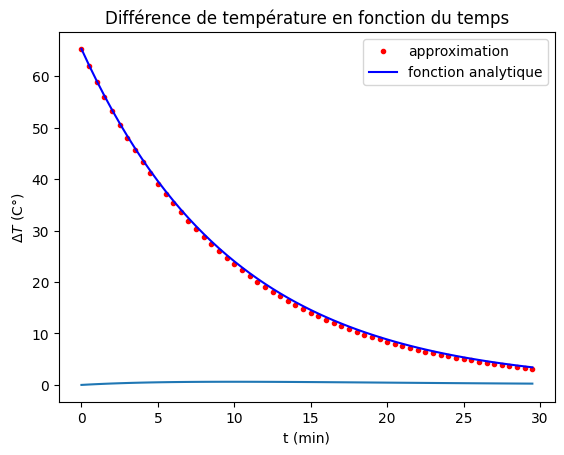

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#Conditions initiales
t0 = 0
D0 = 65.3
r=0.1

#Temps
tf=30
pas = 0.5

t_tab=np.arange(0,30,0.5)


#Initialisation fonction
D = np.zeros(t_tab.shape)
D[0] = D0

def derD(i,t):
    return -r*D[i]

for i in range(len(t_tab)-1):
    D[i+1] = D[i] + pas*derD(i,t_tab[i])


plt.plot(t_tab,D, "r.", label = "approximation")

def DFunc(t):
    return D0*np.exp(-r*t)

plt.plot(t_tab,DFunc(t_tab),"b-", label ="fonction analytique")

plt.xlabel("t (min)")
plt.ylabel("$\Delta T$ (C°)")
plt.title("Différence de température en fonction du temps")
plt.legend()


## Méthodes de Runge-Kutta
La méthode d'Euler est simple à programmer mais est toutefois peu précise au-delà des temps
courts. Il existe de nombreuses méthodes pour y remédier. 
Une classe de méthodes couramment utilisées est la classe des méthodes de Runge-Kutta présentées ci-dessous.

Considérons les  équations différentielles ordinaires d'ordre 1 de la forme :

$$
    u'(t) = F(u,t)
$$

avec une  condition initiale :

$$
u(0) = U_0
$$

où $u$ est une quantité scalaire ou vectorielle.

L'intégration de l'EDO entre $t_k$ et $t_{k+1}= t_k+\Delta t $ 
donne formellement :

$$
u(t_{k+1})-u(t_k) = \int_{t_k}^{t_k+\Delta t} \, F(u(t),t)\,\text{d}t
$$

Dans la méthode d'Euler explicite, l'intégrale est approximée par

$$
\int_{t_k}^{t_k+\Delta t} \, F(u(t),t)\,\text{d}t = F(u(t_k),t_k) \Delta t
$$

À chaque pas l'erreur est de l'ordre de $M(\Delta t)^2/2$ où $M$ est l'ordre
de grandeur de la dérivée de $F$ par rapport à $t$.
Au bout de $N$ pas d'intégration, l'erreur cumulée est donc de l'ordre
de $\Delta t$ (et on voit facilement qu'il en sera de même pour la méthode implicite).
D'où la qualification de méthode d'ordre 1 en $\Delta t$ donnée à la méthode d'Euler. 

## Methodes de Runge-Kutta (explicite) d'ordre 2 (méthodes RK2) :
               
On peut améliorer l'estimation $u_{k+1}$ de $u(t_{k+1})$ en évaluant $F$ à un point 
intermédiaire, par exemple le point milieu du pas d'intégration et refaire l'intégration
de $u$ à partir de $t_k$ en utilisant cette évaluation de l'intégrande :

$$
    d_1 = F(u_k, t_k) 
$$

$$
    u_{k,1} = u(t_k)+ d_1 \frac{\Delta t}{2} 
$$

$$
    d_2 = F\left(u_{k,1}, t_k + \frac{\Delta t}{2} \right)      
$$

$$
u_{k+1} =  u_k  + d_2 \Delta t \;.
$$

D'où le nom de méthode RK2 du point milieu. On peut montrer que les erreurs cumulées sont d'ordre $\Delta t^2$,
d'où le nom de méthode de Runge-Kutta d'ordre 2.

1. Adapter le script de la méthode d'Euler ci-dessous pour appliquer la méthode RK2 et tester la méthode pour le problème du refroidissement de la tasse de café

In [1]:
# Méthode d'Euler
def Euler(start, end, step, v_ini, derivee, ordre):
    '''
        Application de la méthode d'Euler
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        v[:, i + 1] = v[:, i] + step * derivee(v[:, i], t[i])

    # Argument de sortie
    return t, v

2. Calculer l'erreur relative en fonction du temps et comparer à la méthode d'Euler

## Methode de Runge-Kutta (explicite) d'ordre 4 (méthode RK4)
Nous nous limiterons au schéma d'intégration suivant, couramment  utilisé, basé sur une estimation de l'intégrale par la méthode de Simpson :

$$
    d_1 =   F\left(t_k   , u_{k} \right)          
$$

$$
    d_2 =   F\left(t_k + \frac{\Delta t}{2}  , u_{k} + \frac{\Delta t}{2} d_1 \right)
$$

$$
    d_3 =   F\left(t_k + \frac{\Delta t}{2}  , u_{k} + \frac{\Delta t}{2} d_2 \right) 
$$

$$
    d_4 =   F\left(t_k + \Delta t  , u_{k} + \Delta t d_3\right)            
$$

$$
    u_{k+1} =  u_k  +  \frac{\Delta t}{6} \left[ d_1+ 2 d_2  + 2 d_3 + d_4 \right]
$$

où l'erreur par pas est d'ordre $\Delta t^5$ et l'erreur cumulée est  d'ordre $\Delta t^4$.

1. Adapter la fonction de la méthode d'Euler de l'exercice précédent pour appliquer la méthode RK4, et tester la méthode pour le problème du refroidissement de la tasse de café

2. Calculer l'erreur relative en fonction du temps et comparer à la méthode d'Euler et à RK2